**Nama: Muhammad Iqbal Agistany**

# **Research Goal**

Berdasarkan keluhan sebagian besar laki-laki di dunia maya, banyak dari mereka yang kesulitan untuk menebak apa yang diinginkan atau mood si wanita dari chat yang mereka kirimkan. Lelaki diminta untuk menebak apa yang diinginkan si wanita tersebut. Oleh karena itu saya membuat model Deep Learning untuk menebak atau menentukan apa yang sedang dirasakan oleh wanita tanpa harus ada pertengkaran terlebih dahulu antar kedua belah pihak

# **Import Library** 

In [1]:
from nltk.corpus import stopwords
import csv
from sklearn.metrics import confusion_matrix
import string
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional
import nltk
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# **Loading Data**

In [2]:
df = pd.read_csv("emotion.csv")

Menampilkan dataset yang telah diload

In [3]:
df

,text,category
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
19995,im having ssa examination tomorrow in the morn...,sadness
19996,i constantly worry about their fight against n...,joy
19997,i feel its important to share this info for th...,joy
19998,i truly feel that if you are passionate enough...,joy


# **Explaratory Data Analysis (EDA)**

Di tahap ini kita akan mengulik lebih dalam tentang data yang akan kita proses

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      20000 non-null  object
 1   category  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


Dengan melihat data di atas kita dapat mengetahui total kolom = 20000, dtypes: object(2) dan memory usage: 312.6+ KB

In [5]:
df.duplicated().value_counts()

False    19999
True         1
dtype: int64

Dengan melihat data di atas kita dapat mengetahui jumlah data yang duplicate dah hasilnya adalah 1. Nanti kita proses lebih lanjut

In [6]:
df.describe()

,text,category
count,20000,20000
unique,19948,6
top,i feel a remembrance of the strange by justin ...,joy
freq,2,6761


Dengan melihat data di atas kita dapat mengetahui:

*   count: jumlah baris yang ada di dataset
*   unique: ada berapa banyak record yang berbeda di tiap kolom
*   top: record yang paling banyak dan paling atas
*   freq: yang paling sering muncul





In [7]:
df['category'].value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: category, dtype: int64

Dari data di atas kita dapat mengetahui total dari tiap category yang ada di dataset

In [8]:
df.isnull()

,text,category
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
19995,False,False
19996,False,False
19997,False,False
19998,False,False


Dari data di atas, kita dapat mengetahui bahwa tidak ada field yang kosong/null

# **Data Preprocessing**

Menghilangkan simbol-simbol seperti: ‘!”#$%&'()*+,-./:;?@[\]^_`|}~’

In [9]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['text'].apply(lambda x:remove_punctuation(x))

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
19995    im having ssa examination tomorrow in the morn...
19996    i constantly worry about their fight against n...
19997    i feel its important to share this info for th...
19998    i truly feel that if you are passionate enough...
19999    i feel like i just wanna buy any cute make up ...
Name: text, Length: 20000, dtype: object

Menghilangkan huruf kapital dari data text

In [10]:
df['text'].apply(lambda x: x.lower())

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
19995    im having ssa examination tomorrow in the morn...
19996    i constantly worry about their fight against n...
19997    i feel its important to share this info for th...
19998    i truly feel that if you are passionate enough...
19999    i feel like i just wanna buy any cute make up ...
Name: text, Length: 20000, dtype: object

Menghilangkan double spasi

In [11]:
df['text'].apply(lambda x: x.strip())

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
19995    im having ssa examination tomorrow in the morn...
19996    i constantly worry about their fight against n...
19997    i feel its important to share this info for th...
19998    i truly feel that if you are passionate enough...
19999    i feel like i just wanna buy any cute make up ...
Name: text, Length: 20000, dtype: object

In [12]:
df

,text,category
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
19995,im having ssa examination tomorrow in the morn...,sadness
19996,i constantly worry about their fight against n...,joy
19997,i feel its important to share this info for th...,joy
19998,i truly feel that if you are passionate enough...,joy


Export file yang sudah dicleaning ke google drive

In [13]:
from google.colab import drive
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [ ]:
df.to_csv('/drive/My Drive/Orbit/fixdatasetmood.csv')

Tokenizer: text akan displit perkata

In [14]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

vocab_size = 5000 
embedding_dim = 64 # output vector dimensions
max_length = 50 #max kata yang diinputkan
trunc_type = 'post' #if max _lenght terlewati bakal didrop
padding_type = 'post' #merapikan format memadat ke kiri
oov_tok = '<OOV>'  # OOV = Out of Vocabulary
training_portion = .8 #80% dari data akan menjadi data training

articles = []
labels = []

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
with open("/drive/My Drive/Orbit/fixdatasetmood.csv", 'r') as csvfile:
#with open("emotion.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter = "," )
    next(reader)
    
    for row in reader:
        labels.append(row[2])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)

print(len(labels))
print(len(articles))

20000
20000


In [16]:
labels[:5]

['sadness', 'sadness', 'anger', 'love', 'anger']

In [17]:
articles[:2]

['i didnt feel humiliated',
 'i go feeling hopeless damned hopeful around someone cares awake']

In [18]:
train_size = int(len(articles) * training_portion) #Data training: 80% total data

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print("train_size:\t\t",  train_size)
print("train_articles:\t\t", len(train_articles))
print("train_labels:\t\t", len(train_labels))
print("\n")
print("Validation_size:\t", len(validation_articles))
print("validation_articles:\t", len(validation_articles))
print("validation_labels:\t", len(validation_labels))

train_size:		 16000
train_articles:		 16000
train_labels:		 16000


Validation_size:	 4000
validation_articles:	 4000
validation_labels:	 4000


In [19]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_articles)

print(train_sequences[10]), len(train_sequences[10])

print(train_sequences[0]), len(train_sequences[0])

[2, 3, 5, 21, 641, 449, 204, 23]
[2, 53, 3, 584]


(None, 4)

In [20]:
train_padded = pad_sequences(
    train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print("len train_sequnces[0]: ", len(train_sequences[0]))
print("len train_padded[0]: ", len(train_padded[0]))

print("len train_sequences[1]: ", len(train_sequences[1]))
print("len train_padded[1]: ", len(train_padded[1]))

print("len train_sequences[10]: ", len(train_sequences[10]))
print("len train_padded[10]: ", len(train_padded[10]))

len train_sequnces[0]:  4
len train_padded[0]:  50
len train_sequences[1]:  10
len train_padded[1]:  50
len train_sequences[10]:  8
len train_padded[10]:  50


In [21]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(
    validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

print(set(labels))

4000
(4000, 50)
{'love', 'joy', 'anger', 'fear', 'sadness', 'surprise'}


In [22]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(
    label_tokenizer.texts_to_sequences(validation_labels))

label_tokenizer.word_index
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)
print('-------------')
print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[2]
[2]
[3]
(16000, 1)
-------------
[2]
[2]
[2]
(4000, 1)


# **Data Visualization**

In [23]:
from wordcloud import WordCloud
import spacy
from spacy import displacy

(-0.5, 999.5, 499.5, -0.5)

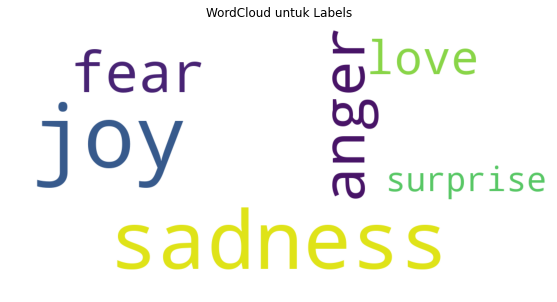

In [24]:
wordcloud = WordCloud(background_color="white",width=1000, height=500).generate(' '.join(train_labels))
plt.figure( figsize=(10,5))
plt.title("WordCloud untuk Labels")
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 999.5, 499.5, -0.5)

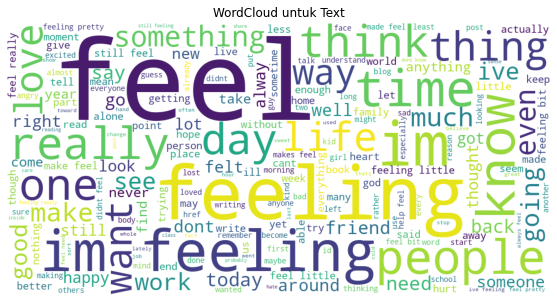

In [25]:
wordcloud = WordCloud(background_color="white",width=1000, height=500).generate(' '.join(train_articles))
plt.figure( figsize=(10,5))
plt.title("WordCloud untuk Text")
plt.imshow(wordcloud)
plt.axis("off")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


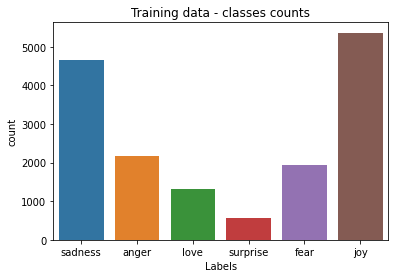

In [26]:
sns.countplot(train_labels)
plt.title("Training data - classes counts")
plt.xlabel("Labels")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


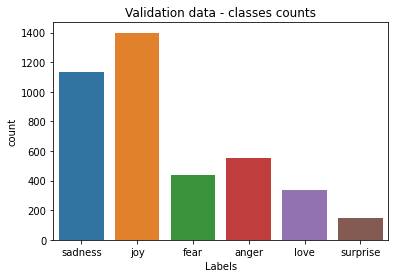

In [27]:
sns.countplot(validation_labels)
plt.title("Validation data - classes counts")
plt.xlabel("Labels")
plt.show()

# **Data Modelling**

In [28]:
model = Sequential()

model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(0.5)) #Target Uji
model.add(Bidirectional(LSTM(embedding_dim)))
model.add(Dense(7, activation='softmax')) # 1 hidden layer dengan 7 neuron

model.summary()

opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6) #Target Uji

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 dropout (Dropout)           (None, None, 64)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 7)                 903       
                                                                 
Total params: 386,951
Trainable params: 386,951
Non-trainable params: 0
_________________________________________________________________


# **Prediksi**

In [29]:
num_epochs = 20 #Target Uji
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/20
500/500 - 19s - loss: 1.1802 - accuracy: 0.5561 - val_loss: 0.5731 - val_accuracy: 0.8152 - 19s/epoch - 39ms/step
Epoch 2/20
500/500 - 15s - loss: 0.3632 - accuracy: 0.8802 - val_loss: 0.2647 - val_accuracy: 0.9013 - 15s/epoch - 30ms/step
Epoch 3/20
500/500 - 15s - loss: 0.1925 - accuracy: 0.9311 - val_loss: 0.2332 - val_accuracy: 0.9082 - 15s/epoch - 31ms/step
Epoch 4/20
500/500 - 15s - loss: 0.1371 - accuracy: 0.9486 - val_loss: 0.2208 - val_accuracy: 0.9172 - 15s/epoch - 30ms/step
Epoch 5/20
500/500 - 15s - loss: 0.1111 - accuracy: 0.9589 - val_loss: 0.2342 - val_accuracy: 0.9185 - 15s/epoch - 30ms/step
Epoch 6/20
500/500 - 15s - loss: 0.0922 - accuracy: 0.9648 - val_loss: 0.2360 - val_accuracy: 0.9170 - 15s/epoch - 29ms/step
Epoch 7/20
500/500 - 15s - loss: 0.0833 - accuracy: 0.9688 - val_loss: 0.2578 - val_accuracy: 0.9140 - 15s/epoch - 30ms/step
Epoch 8/20
500/500 - 15s - loss: 0.0701 - accuracy: 0.9731 - val_loss: 0.2487 - val_accuracy: 0.9118 - 15s/epoch - 30ms/step


In [30]:
txt = ["I thougt she loves me, but now I know that I'm not the only one"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = ['love', 'fear', 'joy', 'sadness', 'surprise', 'anger']

print(pred)
print(np.argmax(pred))
print(labels[np.argmax(pred)-1])

[[0.02037483 0.17378269 0.18518594 0.27136326 0.15568392 0.08893872
  0.10467061]]
3
joy


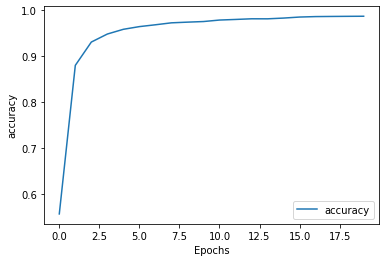

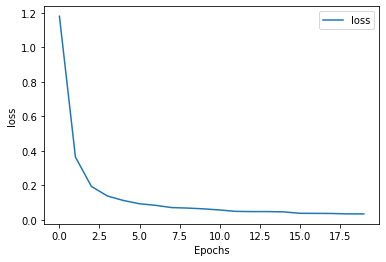

In [31]:
#display history

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# **HASIL UJI**

Pengujian Settingan Default

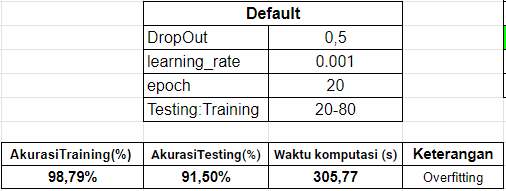

Hasil uji default dari model di atas meiliki Akurasi Training sebesar **98,79%** dan Akurasi Testing sebesar **91,50%**. Hal tersebut masih kurang bagus karena model masih **Overfitting** dimana akurasi pada testing jauh lebih kecil daripada akurasi Training

Pengujian dengan beberapa target uji

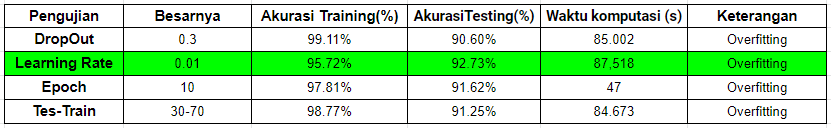

Setelah settingan default tadi diuji dengan beberapa perubahan, didapat bahwa jika learning rate diubah menjadi 0,01 maka model akan memiliki akurasi testing yang lebih baik sebesar 92,73% daripada settingan default yang hanya sebesar 91,50% dan dibanding dengan mengubah target uji lainnya.

Pengujian Activation Layer

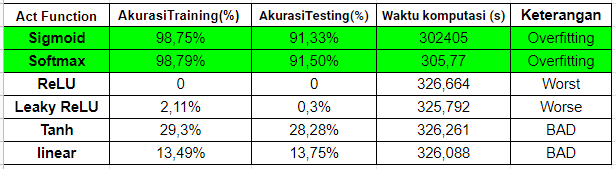

Pada uji Activation layer, didapat bahwa activation layer jenis Sigmoid dan Softmax memiliki Akurasi yang baik dibanding activation layer lainnya. 

Kita lihat pada activation layer ReLU didapat akurasi 0%, hal ini biasanya disebut dengan istilah "Dying ReLU Problem" dimana Neuron ReLU menghasilkan nol dan memiliki turunan nol untuk semua masukan negatif. Karena yang sudah kita pahami bahwa activation function jenis ReLU memiliki rumus max(0,x).

Jadi, jika bobot di network kita selalu mengarah ke input negatif ke dalam neuron ReLU, neuron tersebut secara efektif tidak berkontribusi pada training network. Secara matematis, kontribusi gradien terhadap pembaruan bobot yang berasal dari neuron itu selalu nol.

Untuk beberapa kasus, masalah ini dapat dipecahkan dengan menggunakan activation function Leaky ReLU. Tetapi untuk kasus ini, menggunakan ReLU maupun Leaky ReLU tidak dapat membantu banyak dan lebih baik menggunakan activation function yang lain.

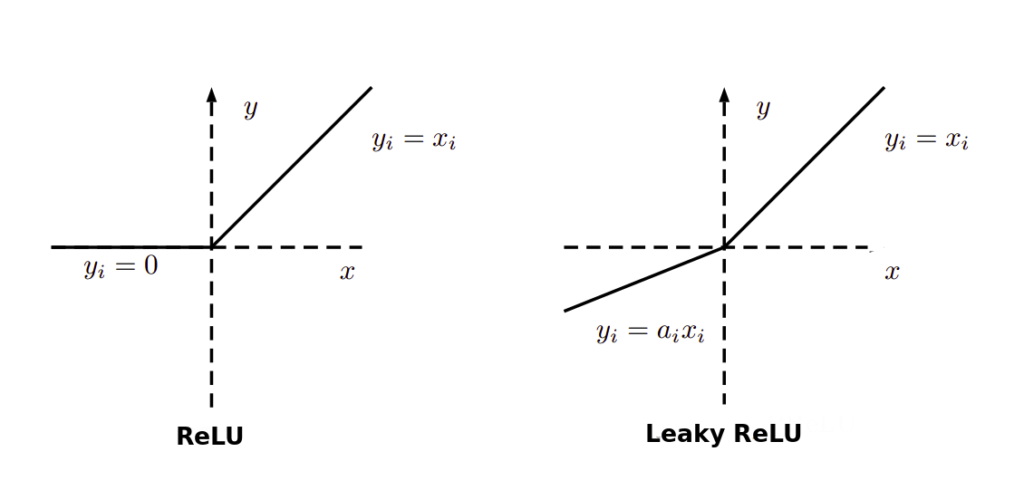